In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('..')
from evaluation.generated_dataset import GeneratedDataset, StructureStorage
from evaluation.novelty import filter_by_unique_structure

/home/kna/.cache/pypoetry/virtualenvs/wyckofftransformer-FeCwefly-py3.12/lib/python3.12/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


In [2]:
diffcsppp = pd.concat(
    [GeneratedDataset.from_cache((label,)).data for label in 
        ("UN-DiffCSP++17", "DiffCSP++", "UN-DiffCSP++42", "UN-DiffCSP++43", "UN-DiffCSP++44")], axis=0, ignore_index=True)

In [3]:
wt = GeneratedDataset.from_cache(("UN-WyckoffTransformer",)).data#.sample(n=diffcsppp.shape[0], random_state=42)

In [4]:
def get_uniqueness(sample_size, dataset, random_state=42):
    sample = dataset.sample(n=sample_size, random_state=random_state)
    return filter_by_unique_structure(sample).shape[0] / sample_size

In [5]:
sample_sizes = np.geomspace(100, len(diffcsppp), 20, dtype=int)
unique_diffcsp = [get_uniqueness(sample_size, diffcsppp) for sample_size in sample_sizes]
unique_wt = [get_uniqueness(sample_size, wt) for sample_size in sample_sizes]

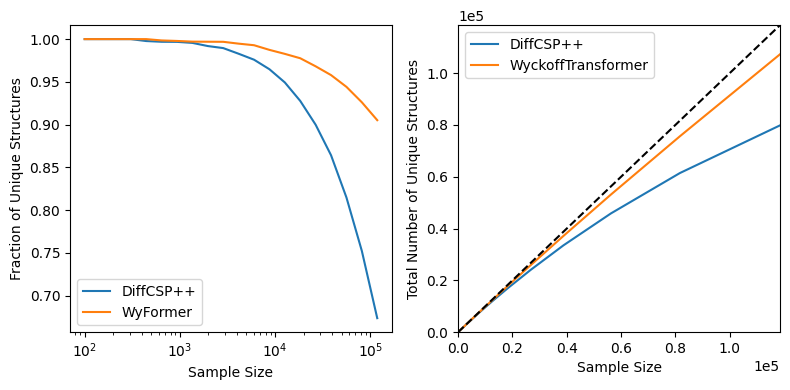

In [54]:
import matplotlib.pyplot as plt
figsize=(8, 4)
fig, (ax_fraction, ax_total) = plt.subplots(1, 2, figsize=figsize)
ax_fraction.plot(sample_sizes, unique_diffcsp, label="DiffCSP++") 
ax_fraction.plot(sample_sizes, unique_wt, label="WyFormer")
ax_total.plot(sample_sizes, sample_sizes*unique_diffcsp, label="DiffCSP++") 
ax_total.plot(sample_sizes, sample_sizes*unique_wt, label="WyckoffTransformer")
ax_total.set_xlabel("Sample Size")
ax_total.set_ylabel("Total Number of Unique Structures")
ax_total.plot([0, sample_sizes[-1]], [0, sample_sizes[-1]], 'k--', label="")
ax_fraction.legend()
ax_total.legend()
ax_total.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax_total.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax_total.set_xlim(0, sample_sizes[-1])
ax_total.set_ylim(0, sample_sizes[-1])
ax_fraction.set_xscale('log')
ax_fraction.set_xlabel("Sample Size")
ax_fraction.set_ylabel("Fraction of Unique Structures")
fig.tight_layout()
fig.savefig("template_and_uniqueness.pdf");